In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

In [2]:
file_name  = 'q2.demographic.csv'

In [3]:
def file2df(fileName):
    return pd.read_csv(fileName, error_bad_lines=False, sep=';')
df = file2df(file_name)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (5,6,7,8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   41024 non-null  object 
 1   flag_bad                41024 non-null  object 
 2   de_age                  41024 non-null  object 
 3   de_gender               41024 non-null  object 
 4   de_date_joined          41023 non-null  object 
 5   de_num_friends          41023 non-null  object 
 6   de_monthly_salary       41023 non-null  object 
 7   de_employment_type      41023 non-null  object 
 8   de_employment_duration  41023 non-null  object 
 9   de_accomodation_type    41022 non-null  float64
 10  de_education            41022 non-null  float64
 11  de_marital_status       41022 non-null  float64
 12  de_children             41022 non-null  float64
 13  ph_total_contacts       41022 non-null  float64
 14  ph_other_device_info    41022 non-null

# <<<<<<<< Clean up/transform the data for modelling purpose>>>>>>>>>
# <<<<<<<<<< Dealing with missing data >>>>>>>>>>

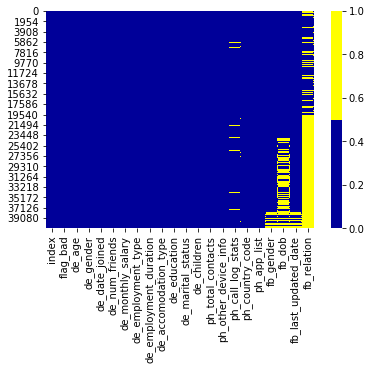

In [5]:
#missing data
cols = df.columns[:] # all columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
def percentMissing(df):
    
    '''
    % of missing.
    
    '''
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    return 
percentMissing(df)

index - 0%
flag_bad - 0%
de_age - 0%
de_gender - 0%
de_date_joined - 0%
de_num_friends - 0%
de_monthly_salary - 0%
de_employment_type - 0%
de_employment_duration - 0%
de_accomodation_type - 0%
de_education - 0%
de_marital_status - 0%
de_children - 0%
ph_total_contacts - 0%
ph_other_device_info - 0%
ph_call_log_stats - 5%
ph_country_code - 0%
ph_app_list - 0%
fb_gender - 4%
fb_dob - 24%
fb_last_updated_date - 4%
fb_relation - 65%


In [7]:
def dropColumns(df):
    
    '''Drop columns with more then 40% missing value '''
    cols_to_drop = ['fb_relation', 'ph_country_code']
    df_less_fb_relation = df.drop(cols_to_drop, axis=1)
    
    return df_less_fb_relation
df_less_fb_relation=dropColumns(df)


In [8]:
df_less_fb_relation

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_app_list,fb_gender,fb_dob,fb_last_updated_date
0,0,0,26,1,08.04.2018 14:50,2535,3000000,1,51,4.0,2.0,2.0,0.0,66.0,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...","['com.google.android.music', 'com.facebook.orc...",male,11/23/1991,2017-12-21T04:38:00+0000
1,1,0,22,1,02.01.2018 17:17,685,4000000,1,28,4.0,4.0,1.0,0.0,69.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.google.android.instantapps.supervisor', ...",male,01/20/1995,2017-11-25T17:23:09+0000
2,2,1,32,1,01.01.2018 16:39,1765,7000000,1,35,4.0,4.0,2.0,2.0,315.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...","['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,10/13/1985,2017-12-23T18:05:57+0000
3,3,0,31,2,04.01.2018 22:36,407,20000000,3,37,4.0,3.0,2.0,2.0,84.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,07/27/1986,2017-12-05T09:37:19+0000
4,4,0,27,1,02.01.2018 18:12,3064,3000000,1,36,4.0,3.0,1.0,0.0,0.0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,07.05.1990,2017-12-03T09:09:48+0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41019,41017,0,27,2,11.07.2018 22:23,997,5e+06,2,51,4.0,2.0,2.0,2.0,1026.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 5.66, ""percent_...","['com.instagram.android', 'com.google.android....",NaN,NaN,NaN
41020,41018,0,26,1,11.07.2018 20:28,955,3e+06,2,24,4.0,2.0,1.0,0.0,0.0,"{""device_codename"": ""nikel"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 10.71, ""percent...","['com.youmusic.magictiles', 'com.ayopop', 'com...",NaN,NaN,NaN
41021,41019,0,22,2,11.07.2018 23:33,881,3e+06,1,9,4.0,4.0,1.0,0.0,272.0,"{""device_codename"": ""a33g"", ""brand"": ""samsung""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.grabtaxi.passenger', 'jp.co.translimit.b...",female,10.02.1995,2017-10-25T08:05:13+0000
41022,41020,0,29,2,11.07.2018 22:03,540,6e+06,1,51,4.0,2.0,1.0,0.0,0.0,"{""device_codename"": ""santoni"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 1.27, ""percent_...","['cn.wps.moffice_eng', 'com.vuclip.viu', 'com....",NaN,NaN,NaN


In [9]:

#Fill the missing with mode
df_less_fb_relation['fb_dob']=df_less_fb_relation['fb_dob'].fillna(df_less_fb_relation['fb_dob'].mode()[0])
df_less_fb_relation['fb_last_updated_date']=df_less_fb_relation['fb_last_updated_date'].fillna(df_less_fb_relation['fb_last_updated_date'].mode()[0])
df_less_fb_relation['fb_gender']=df_less_fb_relation['fb_gender'].fillna(df_less_fb_relation['fb_gender'].mode()[0])
df_less_fb_relation['ph_call_log_stats']=df_less_fb_relation['ph_call_log_stats'].fillna(df_less_fb_relation['ph_call_log_stats'].mode()[0])



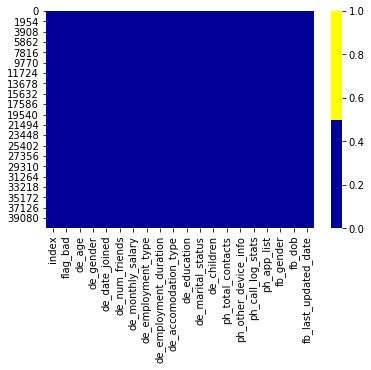

In [10]:
# check the missing data again 
cols = df_less_fb_relation.columns[:] # all columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_less_fb_relation[cols].isnull(), cmap=sns.color_palette(colours))

<<<<<<< dtype conversion >>>>>>>>

In [11]:
df_less_fb_relation['de_age'] = pd.to_numeric(df_less_fb_relation['de_age'] , errors ='coerce')
df_less_fb_relation['index'] = pd.to_numeric(df_less_fb_relation['index'] , errors ='coerce')
df_less_fb_relation['flag_bad'] = pd.to_numeric(df_less_fb_relation['flag_bad'] , errors ='coerce')
df_less_fb_relation['de_gender'] = pd.to_numeric(df_less_fb_relation['de_gender'] , errors ='coerce')
df_less_fb_relation['de_num_friends'] = pd.to_numeric(df_less_fb_relation['de_num_friends'] , errors ='coerce')
df_less_fb_relation['de_monthly_salary'] = pd.to_numeric(df_less_fb_relation['de_monthly_salary'] , errors ='coerce')
df_less_fb_relation['de_employment_type'] = pd.to_numeric(df_less_fb_relation['de_employment_type'] , errors ='coerce')
df_less_fb_relation['de_employment_duration'] = pd.to_numeric(df_less_fb_relation['de_employment_duration'] , errors ='coerce')
#df_less_fb_relation['de_employment_duration'] = pd.to_numeric(df_less_fb_relation['de_employment_duration'] , errors ='coerce')
df_less_fb_relation['de_accomodation_type'] = pd.to_numeric(df_less_fb_relation['de_accomodation_type'] , errors ='coerce')

In [12]:
#Data column has some unwanted string object: 'com.raviefille.naver.blog.PinkMolang2.inputmethod_cn' 
df_less_fb_relation = df_less_fb_relation.drop(df_less_fb_relation[df_less_fb_relation['de_date_joined']== 'com.raviefille.naver.blog.PinkMolang2.inputmethod_cn'].index)

In [13]:
# some more cleaning
df_less_fb_relation = df_less_fb_relation.drop(df_less_fb_relation.index[20299] )
df_less_fb_relation.iloc[20299, :]

index                                                                 20299
flag_bad                                                                  0
de_age                                                                   33
de_gender                                                                 1
de_date_joined                                             20.04.2018 23:01
de_num_friends                                                          284
de_monthly_salary                                                     6e+06
de_employment_type                                                        2
de_employment_duration                                                   35
de_accomodation_type                                                      4
de_education                                                              2
de_marital_status                                                         2
de_children                                                               1
ph_total_con

In [14]:
# string to datetime object
df_less_fb_relation['de_date_joined']= pd.to_datetime(df_less_fb_relation['de_date_joined'], format='%d.%m.%Y %H:%M')

#df_less_fb_relation['fb_dob']= pd.to_datetime(df_less_fb_relation['fb_dob'], format='%m/%d/%Y')
df_less_fb_relation['fb_dob'] = pd.to_datetime(df_less_fb_relation['fb_dob'])
df_less_fb_relation['fb_dob']= pd.to_datetime(df_less_fb_relation['fb_dob'], format='%m/%d/%Y')
df_less_fb_relation['fb_dob']
#df_less_fb_relation['de_date_joined'].to_string()
df_less_fb_relation['fb_last_updated_date'] = pd.to_datetime(df_less_fb_relation['fb_last_updated_date'])
df_less_fb_relation['fb_last_updated_date']

# 'com.raviefille.naver.blog.PinkMolang2.inputmethod_cn'
#20299  'com.raviefille.naver.blog.PinkMolang2.inputmethod_cn'

0       2017-12-21 04:38:00+00:00
1       2017-11-25 17:23:09+00:00
2       2017-12-23 18:05:57+00:00
3       2017-12-05 09:37:19+00:00
4       2017-12-03 09:09:48+00:00
                   ...           
41019   2017-12-02 11:33:20+00:00
41020   2017-12-02 11:33:20+00:00
41021   2017-10-25 08:05:13+00:00
41022   2017-12-02 11:33:20+00:00
41023   2018-01-03 09:41:23+00:00
Name: fb_last_updated_date, Length: 41023, dtype: datetime64[ns, UTC]

In [15]:
# dtypes in order
df_less_fb_relation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41023 entries, 0 to 41023
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   index                   41022 non-null  float64            
 1   flag_bad                41022 non-null  float64            
 2   de_age                  41022 non-null  float64            
 3   de_gender               41022 non-null  float64            
 4   de_date_joined          41022 non-null  datetime64[ns]     
 5   de_num_friends          41022 non-null  float64            
 6   de_monthly_salary       41022 non-null  float64            
 7   de_employment_type      41022 non-null  float64            
 8   de_employment_duration  41022 non-null  float64            
 9   de_accomodation_type    41022 non-null  float64            
 10  de_education            41022 non-null  float64            
 11  de_marital_status       41022 non-null  f

In [16]:
# numeric data only 
df_numeric_less_fb_relation = df_less_fb_relation.select_dtypes(include=[np.number])
numeric_cols = df_numeric_less_fb_relation.columns.values

In [17]:
df_numeric_less_fb_relation

,index,flag_bad,de_age,de_gender,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,de_children,ph_total_contacts
0,0.0,0.0,26.0,1.0,2535.0,3000000.0,1.0,51.0,4.0,2.0,2.0,0.0,66.0
1,1.0,0.0,22.0,1.0,685.0,4000000.0,1.0,28.0,4.0,4.0,1.0,0.0,69.0
2,2.0,1.0,32.0,1.0,1765.0,7000000.0,1.0,35.0,4.0,4.0,2.0,2.0,315.0
3,3.0,0.0,31.0,2.0,407.0,20000000.0,3.0,37.0,4.0,3.0,2.0,2.0,84.0
4,4.0,0.0,27.0,1.0,3064.0,3000000.0,1.0,36.0,4.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41019,41017.0,0.0,27.0,2.0,997.0,5000000.0,2.0,51.0,4.0,2.0,2.0,2.0,1026.0
41020,41018.0,0.0,26.0,1.0,955.0,3000000.0,2.0,24.0,4.0,2.0,1.0,0.0,0.0
41021,41019.0,0.0,22.0,2.0,881.0,3000000.0,1.0,9.0,4.0,4.0,1.0,0.0,272.0
41022,41020.0,0.0,29.0,2.0,540.0,6000000.0,1.0,51.0,4.0,2.0,1.0,0.0,0.0


# Analysing patterns in the data 

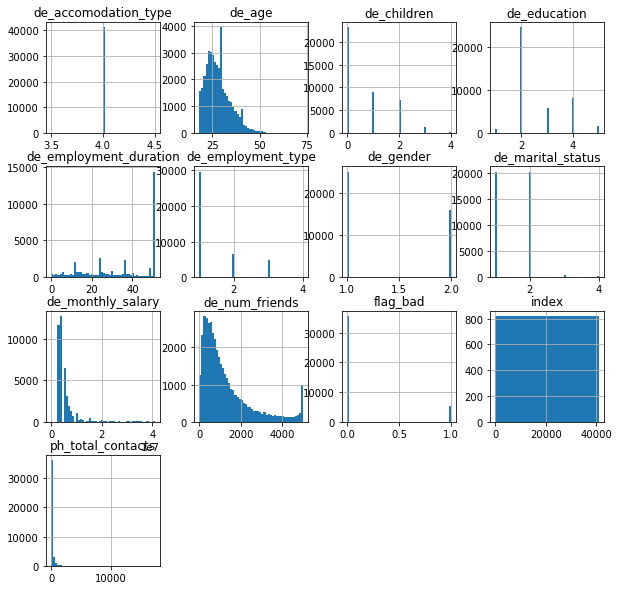

In [18]:
#plt.figure(figsize=(15, 12))
df_numeric_less_fb_relation.hist(bins=50, figsize = (10,10))
plt.show()

 Some points from data:
1. Data is asymetric and skewed.
2. People are young mostly, there is one outlier.
 

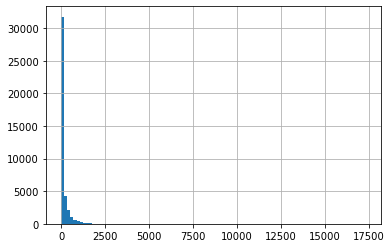

In [19]:
df_numeric_less_fb_relation['ph_total_contacts'].hist(bins=100)

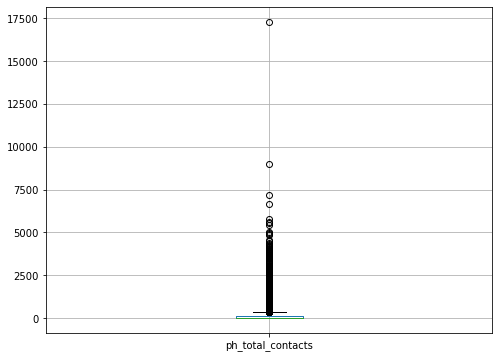

In [20]:
#df_numeric['de_age'].boxplot(column=['life_sq'])
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df_numeric_less_fb_relation.boxplot(column='ph_total_contacts', ax=ax)

In [21]:
df_less_fb_relation['ph_app_list'][7]

"['com.finaccel.android', 'com.whatsapp', 'com.zentertain.photoeditor', 'com.facebook.lite']"

In [22]:
df_less_fb_relation

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_app_list,fb_gender,fb_dob,fb_last_updated_date
0,0.0,0.0,26.0,1.0,2018-04-08 14:50:00,2535.0,3000000.0,1.0,51.0,4.0,2.0,2.0,0.0,66.0,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...","['com.google.android.music', 'com.facebook.orc...",male,1991-11-23,2017-12-21 04:38:00+00:00
1,1.0,0.0,22.0,1.0,2018-01-02 17:17:00,685.0,4000000.0,1.0,28.0,4.0,4.0,1.0,0.0,69.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.google.android.instantapps.supervisor', ...",male,1995-01-20,2017-11-25 17:23:09+00:00
2,2.0,1.0,32.0,1.0,2018-01-01 16:39:00,1765.0,7000000.0,1.0,35.0,4.0,4.0,2.0,2.0,315.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...","['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,1985-10-13,2017-12-23 18:05:57+00:00
3,3.0,0.0,31.0,2.0,2018-01-04 22:36:00,407.0,20000000.0,3.0,37.0,4.0,3.0,2.0,2.0,84.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,1986-07-27,2017-12-05 09:37:19+00:00
4,4.0,0.0,27.0,1.0,2018-01-02 18:12:00,3064.0,3000000.0,1.0,36.0,4.0,3.0,1.0,0.0,0.0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,1990-07-05,2017-12-03 09:09:48+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41019,41017.0,0.0,27.0,2.0,2018-07-11 22:23:00,997.0,5000000.0,2.0,51.0,4.0,2.0,2.0,2.0,1026.0,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 5.66, ""percent_...","['com.instagram.android', 'com.google.android....",male,1945-08-17,2017-12-02 11:33:20+00:00
41020,41018.0,0.0,26.0,1.0,2018-07-11 20:28:00,955.0,3000000.0,2.0,24.0,4.0,2.0,1.0,0.0,0.0,"{""device_codename"": ""nikel"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 10.71, ""percent...","['com.youmusic.magictiles', 'com.ayopop', 'com...",male,1945-08-17,2017-12-02 11:33:20+00:00
41021,41019.0,0.0,22.0,2.0,2018-07-11 23:33:00,881.0,3000000.0,1.0,9.0,4.0,4.0,1.0,0.0,272.0,"{""device_codename"": ""a33g"", ""brand"": ""samsung""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...","['com.grabtaxi.passenger', 'jp.co.translimit.b...",female,1995-10-02,2017-10-25 08:05:13+00:00
41022,41020.0,0.0,29.0,2.0,2018-07-11 22:03:00,540.0,6000000.0,1.0,51.0,4.0,2.0,1.0,0.0,0.0,"{""device_codename"": ""santoni"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 1.27, ""percent_...","['cn.wps.moffice_eng', 'com.vuclip.viu', 'com....",male,1945-08-17,2017-12-02 11:33:20+00:00


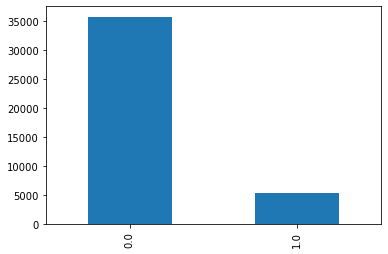

In [23]:
df_numeric_less_fb_relation['flag_bad'].value_counts().plot.bar()


#Seems mostly peopel are good customers

In [24]:

sectors = df_numeric_less_fb_relation .groupby (["flag_bad", "de_education"]).sum()

sectors
#df_new 

index    de_age  de_gender  de_num_friends  \
flag_bad de_education                                                     
0.0      1.0            15696006.0   21061.0      856.0        907588.0   
         2.0           432040983.0  570516.0    28631.0      27630811.0   
         3.0           104361349.0  153206.0     7499.0       5890807.0   
         4.0           150520980.0  217336.0    10779.0       9159213.0   
         5.0            30119540.0   44979.0     2065.0       1778424.0   
1.0      1.0             3160969.0    3981.0      184.0        212033.0   
         2.0            73525033.0   96146.0     4786.0       4743594.0   
         3.0            13700139.0   20330.0      920.0        715300.0   
         4.0            16722569.0   24961.0     1117.0        952645.0   
         5.0             1534163.0    3111.0      121.0        108509.0   

                       de_monthly_salary  de_employment_type  \
flag_bad de_education                                          
0.0      1.0                3.279000e+09              1101.0   
         2.0                9.463700e+10             29404.0   
         3.0                2.961800e+10              6950.0   
         4.0                4.592500e+10              9967.0   
         5.0                1.134300e+10              1973.0   
1.0      1.0                7.630000e+08               242.0   
         2.0                1.676800e+10              5374.0   
         3.0                3.960000e+09               967.0   
         4.0                5.473000e+09              1197.0   
         5.0                8.390000e+08               140.0   

                       de_employment_duration  de_accomodation_type  \
flag_bad de_education                                                 
0.0      1.0                          24646.0                2844.0   
         2.0                         699653.0               83972.0   
         3.0                         178361.0               20360.0   
         4.0                         249797.0               29760.0   
         5.0                          51678.0                5872.0   
1.0      1.0                           4530.0                 580.0   
         2.0                         107165.0               14384.0   
         3.0                          22924.0                2672.0   
         4.0                          29524.0                3272.0   
         5.0                           3411.0                 372.0   

                       de_marital_status  de_children  ph_total_contacts  
flag_bad de_education                                                     
0.0      1.0                      1204.0        639.0            56843.0  
         2.0                     31782.0      13988.0          2148748.0  
         3.0                      8222.0       4305.0           831212.0  
         4.0                     11281.0       5014.0          1227747.0  
         5.0                      2291.0       1086.0           275148.0  
1.0      1.0                       232.0        113.0            14890.0  
         2.0                      5499.0       2468.0           371865.0  
         3.0                      1096.0        630.0           113624.0  
         4.0                      1323.0        680.0           144159.0  
         5.0                       156.0         78.0            26894.0

    # 29000 out of 41000 people who have employment2  are good customers
    # also, 5000 out of 7500 bad customers have employemnet2
    # So both part time employemnet holders are good and bad customers, good outweighing bad.

In [25]:

sectors = df_numeric_less_fb_relation .groupby (["flag_bad", "de_gender"]).count()

sectors
#df_new 

index  de_age  de_num_friends  de_monthly_salary  \
flag_bad de_gender                                                     
0.0      1.0        21574   21574           21574              21574   
         2.0        14128   14128           14128              14128   
1.0      1.0         3512    3512            3512               3512   
         2.0         1808    1808            1808               1808   

                    de_employment_type  de_employment_duration  \
flag_bad de_gender                                               
0.0      1.0                     21574                   21574   
         2.0                     14128                   14128   
1.0      1.0                      3512                    3512   
         2.0                      1808                    1808   

                    de_accomodation_type  de_education  de_marital_status  \
flag_bad de_gender                                                          
0.0      1.0                       21574         21574              21574   
         2.0                       14128         14128              14128   
1.0      1.0                        3512          3512               3512   
         2.0                        1808          1808               1808   

                    de_children  ph_total_contacts  
flag_bad de_gender                                  
0.0      1.0              21574              21574  
         2.0              14128              14128  
1.0      1.0               3512               3512  
         2.0               1808               1808

#again 21000 good customers are male, and 3500 bad customers are male. 

In [26]:

sectors = df_numeric_less_fb_relation .groupby (["flag_bad", "de_marital_status"]).count()

sectors
#df_new 

index  de_age  de_gender  de_num_friends  \
flag_bad de_marital_status                                             
0.0      1.0                17544   17544      17544           17544   
         2.0                17497   17497      17497           17497   
         3.0                  402     402        402             402   
         4.0                  259     259        259             259   
1.0      1.0                 2610    2610       2610            2610   
         2.0                 2523    2523       2523            2523   
         3.0                   98      98         98              98   
         4.0                   89      89         89              89   

                            de_monthly_salary  de_employment_type  \
flag_bad de_marital_status                                          
0.0      1.0                            17544               17544   
         2.0                            17497               17497   
         3.0                              402                 402   
         4.0                              259                 259   
1.0      1.0                             2610                2610   
         2.0                             2523                2523   
         3.0                               98                  98   
         4.0                               89                  89   

                            de_employment_duration  de_accomodation_type  \
flag_bad de_marital_status                                                 
0.0      1.0                                 17544                 17544   
         2.0                                 17497                 17497   
         3.0                                   402                   402   
         4.0                                   259                   259   
1.0      1.0                                  2610                  2610   
         2.0                                  2523                  2523   
         3.0                                    98                    98   
         4.0                                    89                    89   

                            de_education  de_children  ph_total_contacts  
flag_bad de_marital_status                                                
0.0      1.0                       17544        17544              17544  
         2.0                       17497        17497              17497  
         3.0                         402          402                402  
         4.0                         259          259                259  
1.0      1.0                        2610         2610               2610  
         2.0                        2523         2523               2523  
         3.0                          98           98                 98  
         4.0                          89           89                 89

  Number of children for both good and bad customers are seldomly 3 and 4, while both good and bad customers have equal distribition for 1 and 2 shildren

In [27]:
good = df_numeric_less_fb_relation['flag_bad'].value_counts()[0]
bad = df_numeric_less_fb_relation['flag_bad'].value_counts()[1]
total = good +bad
percentage_bad = bad/total *100
print ('percentage bad:', percentage_bad)

percentage bad: 12.96865096777339


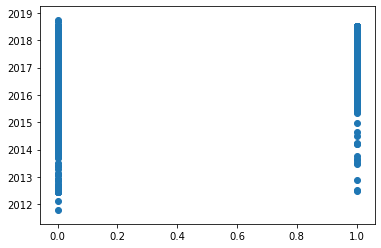

In [28]:
#Checking distribution of dates against flag_bad
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_less_fb_relation['flag_bad'], df_less_fb_relation['fb_last_updated_date'])
plt.show()

In [29]:
call_info = df_less_fb_relation['ph_call_log_stats']

In [30]:
#df2 = pd.DataFrame(call_info.values.tolist(), index=call_info.index)
df["call_information"] = call_info .apply(lambda x : dict(eval(x)) )
df3= df["call_information"] .apply(pd.Series)
df3 = df3.iloc[:, 1:]

In [31]:
df_final = pd.concat([df_less_fb_relation, df3], axis=1).drop('ph_call_log_stats', axis=1)

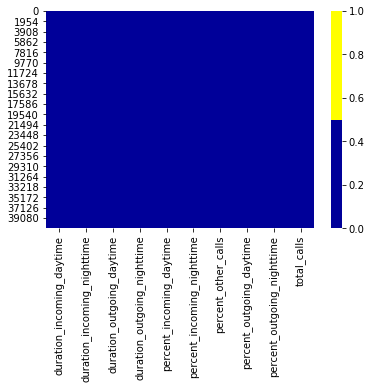

In [32]:
#missing data
cols = df3[:] # all columns
colours = ['#000099', '#ffff00'] # specify the colours 
sns.heatmap(df3.isnull(), cmap=sns.color_palette(colours))

#Eliminating outliers

In [33]:
#Eliminating outliers
df_final_filtered = df_final[df_final['duration_incoming_nighttime'] >= 0]
df_final_filtered = df_final_filtered[df_final_filtered['duration_outgoing_daytime'] <= 1200000]
df_final_filtered = df_final_filtered[(df_final_filtered['duration_incoming_daytime'] >=0) & (df_final_filtered['duration_incoming_daytime']<=300000)]
df_final_filtered

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,...,duration_incoming_daytime,duration_incoming_nighttime,duration_outgoing_daytime,duration_outgoing_nighttime,percent_incoming_daytime,percent_incoming_nighttime,percent_other_calls,percent_outgoing_daytime,percent_outgoing_nighttime,total_calls
0,0.0,0.0,26.0,1.0,2018-04-08 14:50:00,2535.0,3000000.0,1.0,51.0,4.0,...,1195.0,293.0,1164.0,42358.0,3.67,1.83,2.75,28.44,63.30,109.0
1,1.0,0.0,22.0,1.0,2018-01-02 17:17:00,685.0,4000000.0,1.0,28.0,4.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,2.0
2,2.0,1.0,32.0,1.0,2018-01-01 16:39:00,1765.0,7000000.0,1.0,35.0,4.0,...,5212.0,1846.0,5490.0,2911.0,13.56,6.65,13.30,41.76,24.73,376.0
3,3.0,0.0,31.0,2.0,2018-01-04 22:36:00,407.0,20000000.0,3.0,37.0,4.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,4.0,0.0,27.0,1.0,2018-01-02 18:12:00,3064.0,3000000.0,1.0,36.0,4.0,...,0.0,0.0,14.0,84.0,0.00,0.00,0.00,46.67,53.33,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41019,41017.0,0.0,27.0,2.0,2018-07-11 22:23:00,997.0,5000000.0,2.0,51.0,4.0,...,7960.0,1786.0,7889.0,2356.0,22.22,5.66,13.74,42.42,15.96,495.0
41020,41018.0,0.0,26.0,1.0,2018-07-11 20:28:00,955.0,3000000.0,2.0,24.0,4.0,...,465.0,123.0,322.0,305.0,17.86,10.71,10.71,42.86,17.86,56.0
41021,41019.0,0.0,22.0,2.0,2018-07-11 23:33:00,881.0,3000000.0,1.0,9.0,4.0,...,1190.0,0.0,74.0,21.0,16.67,0.00,14.58,43.75,25.00,48.0
41022,41020.0,0.0,29.0,2.0,2018-07-11 22:03:00,540.0,6000000.0,1.0,51.0,4.0,...,3081.0,8.0,405.0,170.0,22.93,1.27,31.21,40.13,4.46,157.0


# Feature Selection/ Engineering


In [34]:
df_final_filtered_datedropped = df_final_filtered.drop(labels=['de_monthly_salary','de_date_joined', 'fb_dob', 'fb_last_updated_date', 'ph_other_device_info',  'ph_app_list', 'fb_gender'], axis=1).reset_index()

In [35]:
#np.any(np.isnan(df_final_filtered_datedropped))
df_final_filtered_datedropped = df_final_filtered_datedropped.dropna()

In [36]:
#df3= df3.fillna(lambda x: x.median())
#df3 = df3.reset_index()
#df_final_filtered_datedropped = df_final_filtered_datedropped.reset_index()
#np.any(np.isnan(df_final_filtered_datedropped))
np.any(np.isnan(df_final_filtered_datedropped))

False

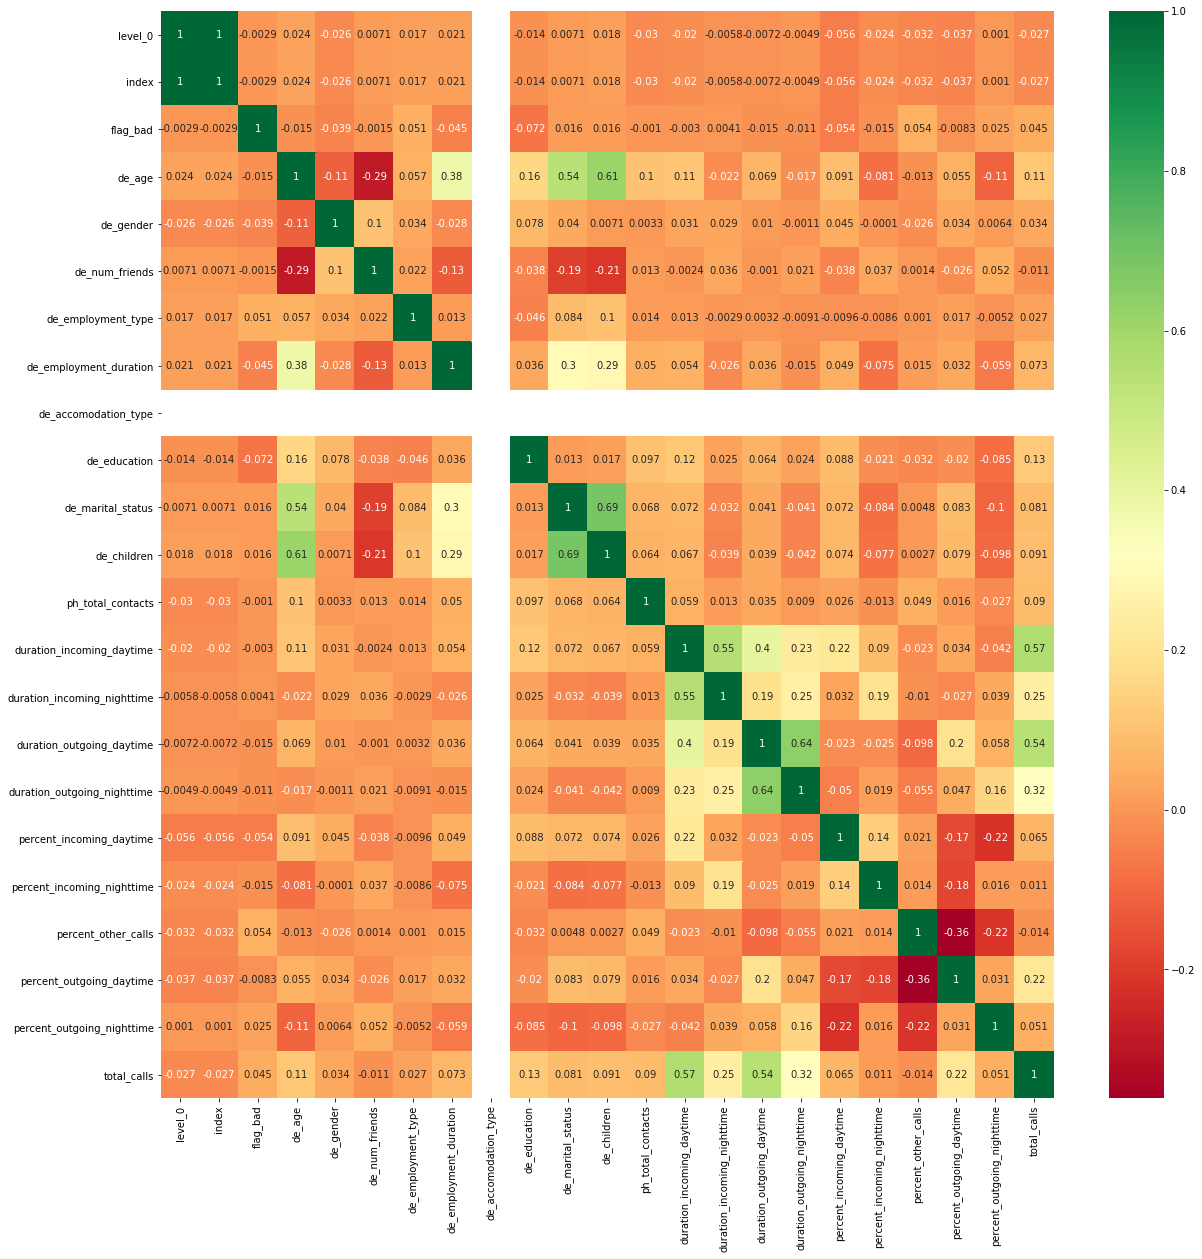

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
X = df_final_filtered_datedropped.iloc[:5, -10:] #independent columns
y = df_final_filtered_datedropped.iloc[:,1] 
#get correlations of each features in dataset
corrmat = df_final_filtered_datedropped.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_final_filtered_datedropped[top_corr_features].corr(),annot=True,cmap="RdYlGn")

 Seems like bad_flag is not strongly related to these values

In [38]:
df_strings = df_final_filtered[['flag_bad','de_monthly_salary','de_date_joined', 'fb_dob', 'fb_last_updated_date', 'ph_other_device_info',  'ph_app_list', 'de_gender']]

In [39]:
#df2 = pd.DataFrame(call_info.values.tolist(), index=call_info.index)
#df["call_information"] = call_info .apply(lambda x : dict(eval(x)) )
#df3= df["call_information"] .apply(pd.Series)
#df3 = df3.iloc[:, 1:]

In [40]:
apps_used = df_strings['ph_app_list']
df_strings['number_of_apps'] = apps_used.str.len()

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
 df_strings = df_strings.dropna()

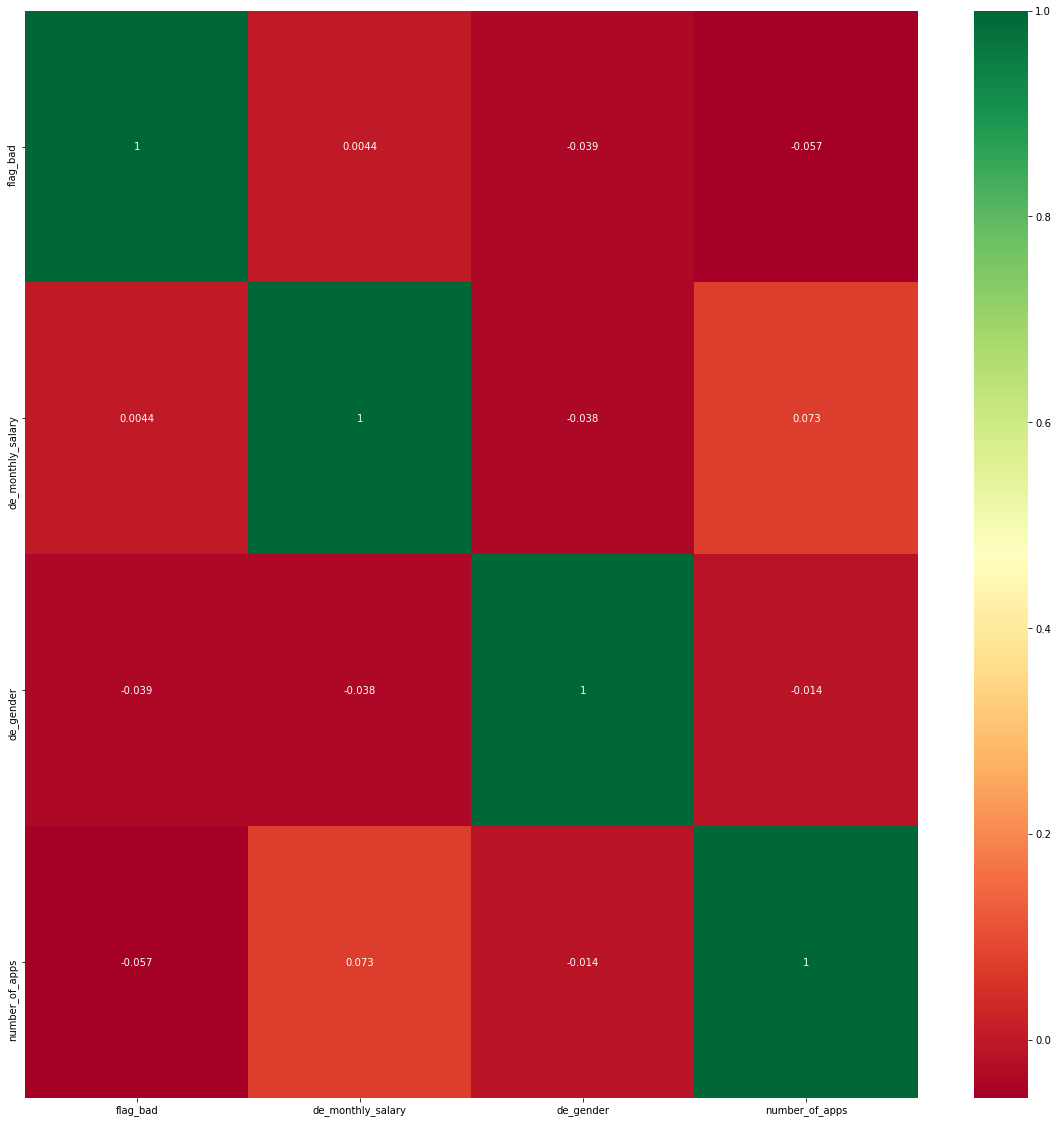

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
X =  df_strings.iloc[:,-2:]#independent columns
y =  df_strings.iloc[:, 0]
#get correlations of each features in dataset
corrmat = df_strings.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_strings[top_corr_features].corr(),annot=True,cmap="RdYlGn")

same story not strongly related with flag_bad

[0.01161557 0.98838443]


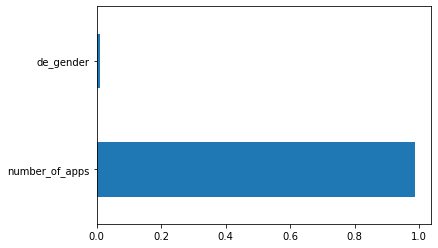

In [43]:
import pandas as pd
import numpy as np

#X = df_final_filtered_datedropped.iloc[:, 2:] #independent columns
X =  df_strings.iloc[:,-2:]
y = df_strings.iloc[:,0] 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

 Seems strongly connected with the newely created feature: number of apps installed

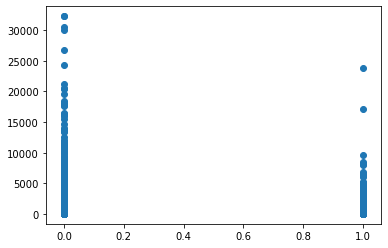

In [44]:
#Check distribution of various coloumns against flagbad
# These are the feattures I will consider for sure as tehy are newely cretaed and show quite strong variation
# against the flag_bad

import matplotlib.pyplot as plt
import numpy as np

#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_daytime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_daytime'])
plt.scatter(df_strings['flag_bad'], df_strings['number_of_apps'])
#plt.plot(df_strings['number_of_apps'].index, df_strings['number_of_apps'])
plt.show()

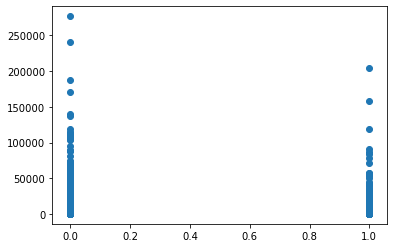

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_daytime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_daytime'])
#plt.scatter(df_strings['flag_bad'], df_strings['number_of_apps'])
#plt.plot(df_strings['number_of_apps'].index, df_strings['number_of_apps'])
plt.show()

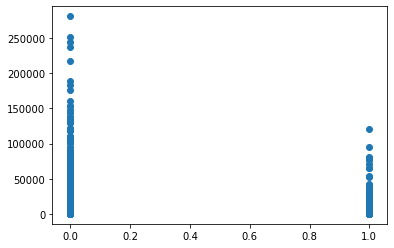

In [46]:
import matplotlib.pyplot as plt
import numpy as np

#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_nighttime'])
plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_daytime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_daytime'])
#plt.scatter(df_strings['flag_bad'], df_strings['number_of_apps'])
#plt.plot(df_strings['number_of_apps'].index, df_strings['number_of_apps'])
plt.show()

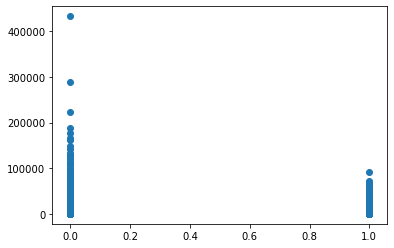

In [47]:
import matplotlib.pyplot as plt
import numpy as np

#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_nighttime'])
plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_daytime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_daytime'])
#plt.scatter(df_strings['flag_bad'], df_strings['number_of_apps'])
#plt.plot(df_strings['number_of_apps'].index, df_strings['number_of_apps'])
plt.show()

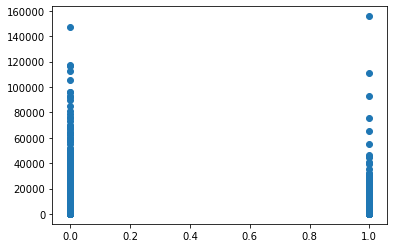

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_nighttime'])
#plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_outgoing_daytime'])
plt.scatter(df_final_filtered['flag_bad'], df_final_filtered['duration_incoming_daytime'])
#plt.scatter(df_strings['flag_bad'], df_strings['number_of_apps'])
#plt.plot(df_strings['number_of_apps'].index, df_strings['number_of_apps'])
plt.show()

In [49]:
df_final_filtered_datedropped = df_final_filtered_datedropped.iloc[:, 1:]
df_final_filtered_datedropped 

,index,flag_bad,de_age,de_gender,de_num_friends,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,...,duration_incoming_daytime,duration_incoming_nighttime,duration_outgoing_daytime,duration_outgoing_nighttime,percent_incoming_daytime,percent_incoming_nighttime,percent_other_calls,percent_outgoing_daytime,percent_outgoing_nighttime,total_calls
0,0.0,0.0,26.0,1.0,2535.0,1.0,51.0,4.0,2.0,2.0,...,1195.0,293.0,1164.0,42358.0,3.67,1.83,2.75,28.44,63.30,109.0
1,1.0,0.0,22.0,1.0,685.0,1.0,28.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,2.0
2,2.0,1.0,32.0,1.0,1765.0,1.0,35.0,4.0,4.0,2.0,...,5212.0,1846.0,5490.0,2911.0,13.56,6.65,13.30,41.76,24.73,376.0
3,3.0,0.0,31.0,2.0,407.0,3.0,37.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,4.0,0.0,27.0,1.0,3064.0,1.0,36.0,4.0,3.0,1.0,...,0.0,0.0,14.0,84.0,0.00,0.00,0.00,46.67,53.33,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,41017.0,0.0,27.0,2.0,997.0,2.0,51.0,4.0,2.0,2.0,...,7960.0,1786.0,7889.0,2356.0,22.22,5.66,13.74,42.42,15.96,495.0
41014,41018.0,0.0,26.0,1.0,955.0,2.0,24.0,4.0,2.0,1.0,...,465.0,123.0,322.0,305.0,17.86,10.71,10.71,42.86,17.86,56.0
41015,41019.0,0.0,22.0,2.0,881.0,1.0,9.0,4.0,4.0,1.0,...,1190.0,0.0,74.0,21.0,16.67,0.00,14.58,43.75,25.00,48.0
41016,41020.0,0.0,29.0,2.0,540.0,1.0,51.0,4.0,2.0,1.0,...,3081.0,8.0,405.0,170.0,22.93,1.27,31.21,40.13,4.46,157.0


In [50]:
df_final_filtered_datedropped 


,index,flag_bad,de_age,de_gender,de_num_friends,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,...,duration_incoming_daytime,duration_incoming_nighttime,duration_outgoing_daytime,duration_outgoing_nighttime,percent_incoming_daytime,percent_incoming_nighttime,percent_other_calls,percent_outgoing_daytime,percent_outgoing_nighttime,total_calls
0,0.0,0.0,26.0,1.0,2535.0,1.0,51.0,4.0,2.0,2.0,...,1195.0,293.0,1164.0,42358.0,3.67,1.83,2.75,28.44,63.30,109.0
1,1.0,0.0,22.0,1.0,685.0,1.0,28.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,2.0
2,2.0,1.0,32.0,1.0,1765.0,1.0,35.0,4.0,4.0,2.0,...,5212.0,1846.0,5490.0,2911.0,13.56,6.65,13.30,41.76,24.73,376.0
3,3.0,0.0,31.0,2.0,407.0,3.0,37.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,4.0,0.0,27.0,1.0,3064.0,1.0,36.0,4.0,3.0,1.0,...,0.0,0.0,14.0,84.0,0.00,0.00,0.00,46.67,53.33,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,41017.0,0.0,27.0,2.0,997.0,2.0,51.0,4.0,2.0,2.0,...,7960.0,1786.0,7889.0,2356.0,22.22,5.66,13.74,42.42,15.96,495.0
41014,41018.0,0.0,26.0,1.0,955.0,2.0,24.0,4.0,2.0,1.0,...,465.0,123.0,322.0,305.0,17.86,10.71,10.71,42.86,17.86,56.0
41015,41019.0,0.0,22.0,2.0,881.0,1.0,9.0,4.0,4.0,1.0,...,1190.0,0.0,74.0,21.0,16.67,0.00,14.58,43.75,25.00,48.0
41016,41020.0,0.0,29.0,2.0,540.0,1.0,51.0,4.0,2.0,1.0,...,3081.0,8.0,405.0,170.0,22.93,1.27,31.21,40.13,4.46,157.0


In [51]:
import ast
df_onehot_device = df_strings['ph_other_device_info'].apply(ast.literal_eval).apply(lambda x: x['brand'])
#df_onehot_device
one_hot_device = pd.get_dummies(df_onehot_device)

In [52]:
#df_onehot_and_bad_flag = pd.concat([df_short_for_features.iloc[:, 0], one_hot_device], axis=1)
#df_onehot_and_bad_flag = df_onehot_and_bad_flag.dropna()

In [53]:
#df_short_for_features = df_final_filtered_datedropped.iloc[:, [2]+ list (range(-10, 0))]
#df_short_for_features.iloc[:, 0]

In [54]:
#df_short_for_features

In [65]:
df_final_filtered_datedropped 

,index,flag_bad,de_age,de_gender,de_num_friends,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,...,duration_incoming_daytime,duration_incoming_nighttime,duration_outgoing_daytime,duration_outgoing_nighttime,percent_incoming_daytime,percent_incoming_nighttime,percent_other_calls,percent_outgoing_daytime,percent_outgoing_nighttime,total_calls
0,0.0,0.0,26.0,1.0,2535.0,1.0,51.0,4.0,2.0,2.0,...,1195.0,293.0,1164.0,42358.0,3.67,1.83,2.75,28.44,63.30,109.0
1,1.0,0.0,22.0,1.0,685.0,1.0,28.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,2.0
2,2.0,1.0,32.0,1.0,1765.0,1.0,35.0,4.0,4.0,2.0,...,5212.0,1846.0,5490.0,2911.0,13.56,6.65,13.30,41.76,24.73,376.0
3,3.0,0.0,31.0,2.0,407.0,3.0,37.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,4.0,0.0,27.0,1.0,3064.0,1.0,36.0,4.0,3.0,1.0,...,0.0,0.0,14.0,84.0,0.00,0.00,0.00,46.67,53.33,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,41017.0,0.0,27.0,2.0,997.0,2.0,51.0,4.0,2.0,2.0,...,7960.0,1786.0,7889.0,2356.0,22.22,5.66,13.74,42.42,15.96,495.0
41014,41018.0,0.0,26.0,1.0,955.0,2.0,24.0,4.0,2.0,1.0,...,465.0,123.0,322.0,305.0,17.86,10.71,10.71,42.86,17.86,56.0
41015,41019.0,0.0,22.0,2.0,881.0,1.0,9.0,4.0,4.0,1.0,...,1190.0,0.0,74.0,21.0,16.67,0.00,14.58,43.75,25.00,48.0
41016,41020.0,0.0,29.0,2.0,540.0,1.0,51.0,4.0,2.0,1.0,...,3081.0,8.0,405.0,170.0,22.93,1.27,31.21,40.13,4.46,157.0


In [128]:
df_final_filtered_datedropped_nunApps = pd.concat([df_final_filtered_datedropped, df_strings['number_of_apps']], axis =1)
df_final_filtered_datedropped_nunApps = df_final_filtered_datedropped_nunApps.dropna()
df_final_filtered_datedropped_nunApps

,index,flag_bad,de_age,de_gender,de_num_friends,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,...,duration_incoming_nighttime,duration_outgoing_daytime,duration_outgoing_nighttime,percent_incoming_daytime,percent_incoming_nighttime,percent_other_calls,percent_outgoing_daytime,percent_outgoing_nighttime,total_calls,number_of_apps
0,0.0,0.0,26.0,1.0,2535.0,1.0,51.0,4.0,2.0,2.0,...,293.0,1164.0,42358.0,3.67,1.83,2.75,28.44,63.30,109.0,1442.0
1,1.0,0.0,22.0,1.0,685.0,1.0,28.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,2.0,1422.0
2,2.0,1.0,32.0,1.0,1765.0,1.0,35.0,4.0,4.0,2.0,...,1846.0,5490.0,2911.0,13.56,6.65,13.30,41.76,24.73,376.0,1167.0
3,3.0,0.0,31.0,2.0,407.0,3.0,37.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1015.0
4,4.0,0.0,27.0,1.0,3064.0,1.0,36.0,4.0,3.0,1.0,...,0.0,14.0,84.0,0.00,0.00,0.00,46.67,53.33,15.0,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,41017.0,0.0,27.0,2.0,997.0,2.0,51.0,4.0,2.0,2.0,...,1786.0,7889.0,2356.0,22.22,5.66,13.74,42.42,15.96,495.0,860.0
41014,41018.0,0.0,26.0,1.0,955.0,2.0,24.0,4.0,2.0,1.0,...,123.0,322.0,305.0,17.86,10.71,10.71,42.86,17.86,56.0,625.0
41015,41019.0,0.0,22.0,2.0,881.0,1.0,9.0,4.0,4.0,1.0,...,0.0,74.0,21.0,16.67,0.00,14.58,43.75,25.00,48.0,2601.0
41016,41020.0,0.0,29.0,2.0,540.0,1.0,51.0,4.0,2.0,1.0,...,8.0,405.0,170.0,22.93,1.27,31.21,40.13,4.46,157.0,650.0


Text(0.5, 1.0, 'Correlation with bad_flag \n')

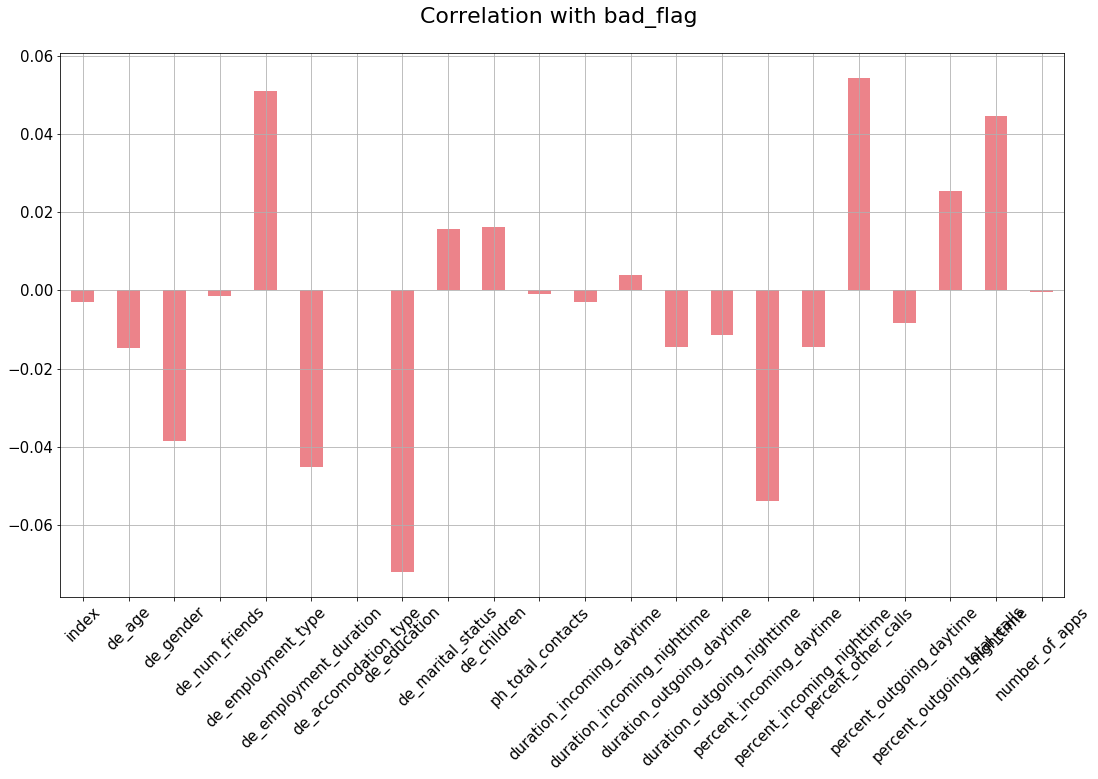

In [129]:
correlations = df_final_filtered_datedropped_nunApps.corrwith(df_final_filtered_datedropped_nunApps.flag_bad)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with bad_flag \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

 Same story - not much strong relation

In [130]:
df_final_filtered_datedropped_nunApps_float= df_final_filtered_datedropped_nunApps.drop(columns='call_information')

KeyError: "['call_information'] not found in axis"

In [131]:
df_final_filtered_datedropped_nunApps_float = df_final_filtered_datedropped_nunApps

In [132]:
response = df_final_filtered_datedropped_nunApps_float["flag_bad"]
dataset= df_final_filtered_datedropped_nunApps_float.drop(columns="flag_bad")

In [133]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2,) #use 0.9 if data is huge.random_state = 0)

In [134]:
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32808, 22)
Number transactions y_train dataset:  (32808,)
Number transactions X_test dataset:  (8202, 22)
Number transactions y_test dataset:  (8202,)


In [135]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [136]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [137]:
y_pred_LR = logreg.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred_LR )
print (acc_LR)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.8702755425505975


In [138]:
classifier_RF = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

In [139]:
# Predicting the Test set results 
y_pred_RF = classifier_RF.predict(X_test)

In [141]:
acc_RF = accuracy_score(y_test, y_pred_RF )
prec_RF = precision_score(y_test, y_pred_RF )
print (acc_RF)
print (prec_RF)
print(recall_score(y_test, y_pred_RF))


0.870031699585467
0.25
0.0009398496240601503


In [142]:
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [165]:
# Predicting the Test set results 
y_pred_DT = classifier_DT.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_DT )
prec_DT = precision_score(y_test, y_pred_DT )
print (prec_DT)


0.1529818496110631


In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix)

[[6158  980]
 [ 887  177]]


In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[7136    2]
 [1062    2]]


In [163]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_LR))

0.5


In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[7135    3]
 [1063    1]]


In [164]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_RF))

0.25


In [152]:
#Working with AUC
probs_LR = logreg.predict_proba(X_test) 
probs_LR = probs_LR[:, 1] 
classifier_roc_auc_LR = accuracy_score(y_test, y_pred_LR )



In [153]:
from sklearn import metrics
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

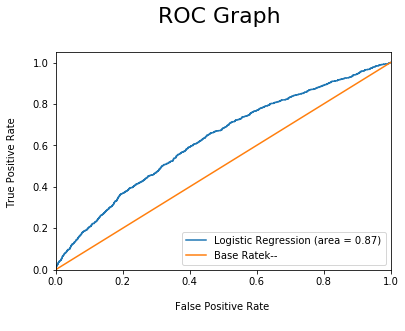

In [154]:
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc_LR)# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

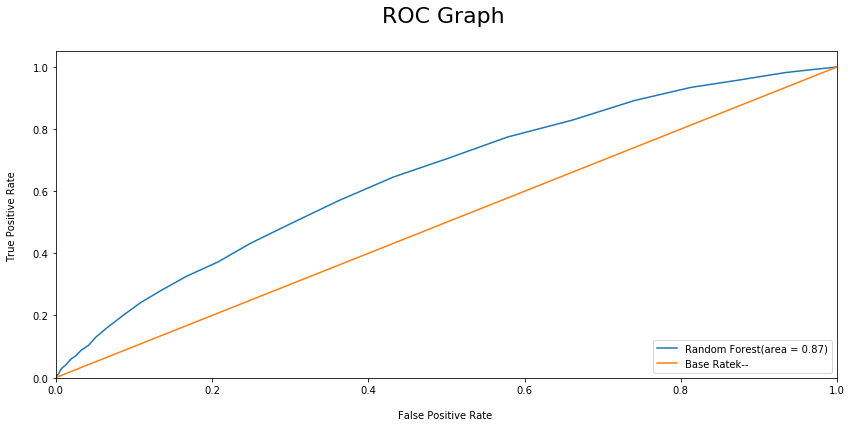

In [155]:
#Working with AUC
probs_RF = classifier_RF.predict_proba(X_test) 
probs_RF = probs_RF[:, 1] 
classifier_roc_auc_RF = accuracy_score(y_test, y_pred_RF )

from sklearn import metrics
rf_fpr_RF, rf_tpr_RF, rf_thresholds_RF = metrics.roc_curve(y_test, classifier_RF.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr_RF, rf_tpr_RF, 
label='Random Forest(area = %0.2f)' % classifier_roc_auc_RF)# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

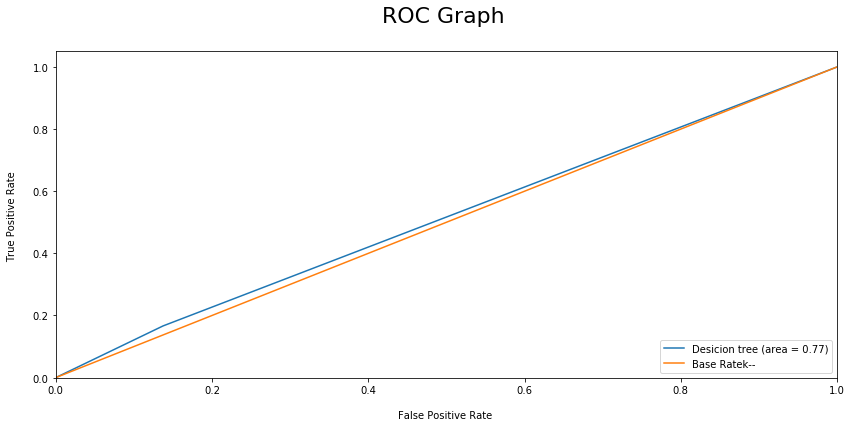

In [156]:
#Working with AUC
probs_DT = classifier_DT.predict_proba(X_test) 
probs_DT = probs_DT[:, 1] 
classifier_roc_auc_DT = accuracy_score(y_test, y_pred_DT )

from sklearn import metrics
rf_fpr_DT, rf_tpr_DT, rf_thresholds_DT = metrics.roc_curve(y_test, classifier_DT.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr_DT, rf_tpr_DT, 
label='Desicion tree (area = %0.2f)' % classifier_roc_auc_DT)# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Result: LR seems to be the best: accuracy score = 87%
# Performance evaluation matrix: acc = accuracy_score(y_test, y_pred )
# Confusion matrix


# >>>>>>>> End of Task 1 >>>>>>>>>>>>>>>>>


# Q4: Answer is 833


# Simple code for the analysis:


In [742]:

import math
bananas = 3000

def next_bananas(initial, max_transport=1000): return initial - math.ceil(initial / max_transport)

for _ in range(1000):
    bananas = next_bananas(bananas, max_transport = 1000)
    print (bananas)

2997
2994
2991
2988
2985
2982
2979
2976
2973
2970
2967
2964
2961
2958
2955
2952
2949
2946
2943
2940
2937
2934
2931
2928
2925
2922
2919
2916
2913
2910
2907
2904
2901
2898
2895
2892
2889
2886
2883
2880
2877
2874
2871
2868
2865
2862
2859
2856
2853
2850
2847
2844
2841
2838
2835
2832
2829
2826
2823
2820
2817
2814
2811
2808
2805
2802
2799
2796
2793
2790
2787
2784
2781
2778
2775
2772
2769
2766
2763
2760
2757
2754
2751
2748
2745
2742
2739
2736
2733
2730
2727
2724
2721
2718
2715
2712
2709
2706
2703
2700
2697
2694
2691
2688
2685
2682
2679
2676
2673
2670
2667
2664
2661
2658
2655
2652
2649
2646
2643
2640
2637
2634
2631
2628
2625
2622
2619
2616
2613
2610
2607
2604
2601
2598
2595
2592
2589
2586
2583
2580
2577
2574
2571
2568
2565
2562
2559
2556
2553
2550
2547
2544
2541
2538
2535
2532
2529
2526
2523
2520
2517
2514
2511
2508
2505
2502
2499
2496
2493
2490
2487
2484
2481
2478
2475
2472
2469
2466
2463
2460
2457
2454
2451
2448
2445
2442
2439
2436
2433
2430
2427
2424
2421
2418
2415
2412
2409
2406
2403
2400


# Testing with a toy dataset: works

In [743]:

import math
bananas = 10

def next_bananas(initial, max_transport=3): return initial - math.ceil(initial / max_transport)

for _ in range(3):
    bananas = next_bananas(bananas, max_transport = 3)
    print (bananas)

6
4
2


# code encapsulated in class

In [744]:
class BananaSolver:
    def __init__(self, initial_bananas, max_per_transport, tax_per_km, total_km):
        self.initial_bananas = initial_bananas
        self.max_per_transport = max_per_transport
        self.tax_per_km = tax_per_km
        self.total_km = total_km
    
    def next_bananas(self, initial_bananas,  max_per_transport, tax_per_km):
        return initial_bananas - math.ceil(initial_bananas/max_per_transport) * tax_per_km
    
    def solve_bananas(self):
        self.result = self.initial_bananas
        for _ in range(self.total_km):
            self.result = self.next_bananas(self.result, max_per_transport=self.max_per_transport, tax_per_km=self.tax_per_km)
        print(f"The maximal amount of Bananas that can be transported are: {self.result} Bananas")
b = BananaSolver(initial_bananas=3000, max_per_transport=1000, tax_per_km=1, total_km=1000)

In [745]:
b.solve_bananas()

The maximal amount of Bananas that can be transported are: 833 Bananas


In [746]:
# Code with recursivs self calling function: telling whats happening at each step

In [747]:
def bananas_solve(initial, max_per_transport, tax_per_km, total_km):
    if total_km == 0:
        return initial
    else:
        transports = math.ceil(initial/max_per_transport)
        tax_bananas = transports * tax_per_km
        original = initial
        initial = initial - tax_bananas
        print(f"From {original} Bananas, {tax_bananas} were payed for tax for {transports} transports, resulting in {initial} Bananas.")
        return bananas_solve(initial = initial,
                      max_per_transport = max_per_transport,
                      tax_per_km = tax_per_km,
                      total_km = total_km - 1)

In [748]:
bananas_solve(initial=3000, max_per_transport=1000, tax_per_km=1, total_km=1000)

From 3000 Bananas, 3 were payed for tax for 3 transports, resulting in 2997 Bananas.
From 2997 Bananas, 3 were payed for tax for 3 transports, resulting in 2994 Bananas.
From 2994 Bananas, 3 were payed for tax for 3 transports, resulting in 2991 Bananas.
From 2991 Bananas, 3 were payed for tax for 3 transports, resulting in 2988 Bananas.
From 2988 Bananas, 3 were payed for tax for 3 transports, resulting in 2985 Bananas.
From 2985 Bananas, 3 were payed for tax for 3 transports, resulting in 2982 Bananas.
From 2982 Bananas, 3 were payed for tax for 3 transports, resulting in 2979 Bananas.
From 2979 Bananas, 3 were payed for tax for 3 transports, resulting in 2976 Bananas.
From 2976 Bananas, 3 were payed for tax for 3 transports, resulting in 2973 Bananas.
From 2973 Bananas, 3 were payed for tax for 3 transports, resulting in 2970 Bananas.
From 2970 Bananas, 3 were payed for tax for 3 transports, resulting in 2967 Bananas.
From 2967 Bananas, 3 were payed for tax for 3 transports, resulti

833